In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv('./data/parkinsons_updrs.data.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [4]:
data.tail(10)

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
5865,5865,42,61,0,106.76,25.029,36.029,0.00329,0.000024,0.00144,...,0.180,0.01020,0.01287,0.01776,0.03059,0.010377,24.873,0.51983,0.56668,0.113820
5866,5866,42,61,0,115.65,24.401,35.401,0.00448,0.000036,0.00208,...,0.213,0.01121,0.01475,0.01971,0.03362,0.035738,21.252,0.62957,0.57942,0.245670
5867,5867,42,61,0,121.63,23.979,34.979,0.00250,0.000019,0.00116,...,0.193,0.01104,0.01316,0.01987,0.03313,0.012234,20.661,0.47256,0.57177,0.139550
5868,5868,42,61,0,128.67,23.482,34.482,0.00249,0.000021,0.00066,...,0.142,0.00469,0.00773,0.01997,0.01406,0.007452,25.258,0.52976,0.54378,0.088268
5869,5869,42,61,0,136.80,22.908,33.908,0.00274,0.000021,0.00118,...,0.218,0.01375,0.01595,0.02108,0.04126,0.006058,23.935,0.45357,0.56142,0.134460
5870,5870,42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.213670
5871,5871,42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.126210
5872,5872,42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.141570
5873,5873,42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.142040
5874,5874,42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.153360


In [5]:
data.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [6]:
data=data.loc[:,["index","subject#","age","sex","test_time","motor_UPDRS","total_UPDRS","Jitter(%)","Shimmer","NHR","HNR","RPDE","DFA","PPE"]]


array([[<Axes: title={'center': 'motor_UPDRS'}>,
        <Axes: title={'center': 'total_UPDRS'}>,
        <Axes: title={'center': 'Jitter(%)'}>],
       [<Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>]],
      dtype=object)

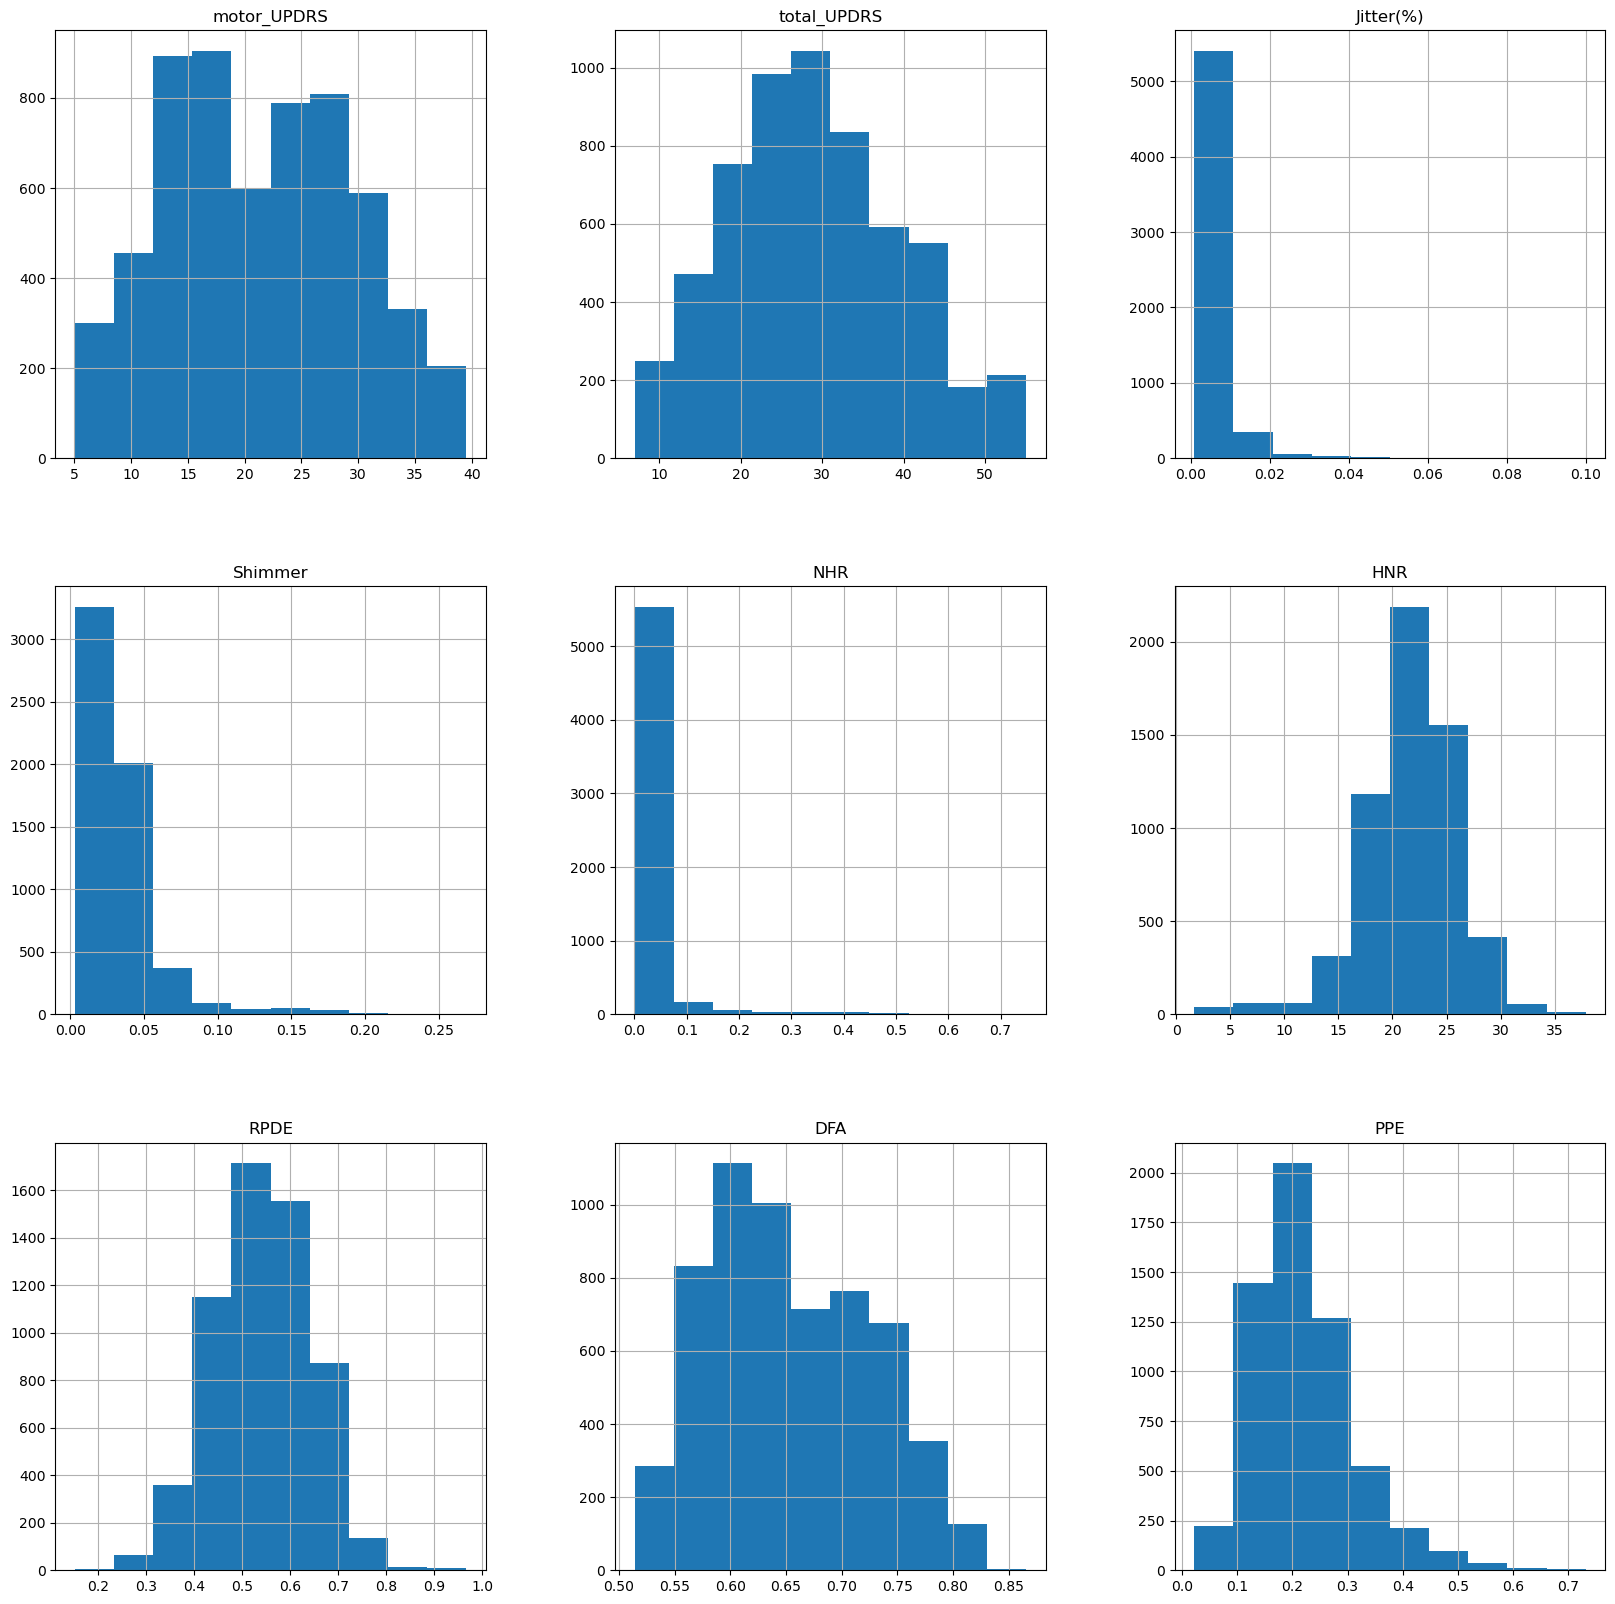

In [7]:
data.hist(column=['motor_UPDRS','total_UPDRS','Jitter(%)','Shimmer','NHR','HNR','RPDE','DFA','PPE'], figsize=(20,20))


In [8]:
data.isnull().sum()

index          0
subject#       0
age            0
sex            0
test_time      0
motor_UPDRS    0
total_UPDRS    0
Jitter(%)      0
Shimmer        0
NHR            0
HNR            0
RPDE           0
DFA            0
PPE            0
dtype: int64

In [9]:
# print all the columns of the dataframe
data.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Shimmer', 'NHR', 'HNR', 'RPDE', 'DFA',
       'PPE'],
      dtype='object')

In [39]:
# # A1.
# # Evaluate the interclass spread between the two classes in the dataset
# # using the following features: motor_UPDRS, total_UPDRS, Jitter(%), Shimmer, NHR, HNR, RPDE, DFA, PPE


# class1_data = np.array(data[data['subject#'] == 1])
# class2_data = np.array(data[data['subject#'] == 2])

# class1_centroid = np.mean(class1_data, axis=0)
# class2_centroid = np.mean(class2_data, axis=0)

# intraclass_spread_class1 = np.mean(np.linalg.norm(class1_data - class1_centroid, axis=1))
# intraclass_spread_class2 = np.mean(np.linalg.norm(class2_data - class2_centroid, axis=1))


# interclass_distance = np.linalg.norm(class1_centroid - class2_centroid)

# print('Class 1 Centroid:', class1_centroid)
# print('Class 2 Centroid:', class2_centroid)
# print('Intraclass Spread Class 1:', intraclass_spread_class1)
# print('Intraclass Spread Class 2:', intraclass_spread_class2)
# print('Interclass Distance:', interclass_distance)


In [34]:
# select one feature vector
feature_vector_1 = np.array(data['motor_UPDRS'])
feature_vector_1 = feature_vector_1.reshape(-1, 1)

feature_vector_2 = np.array(data['total_UPDRS'])
feature_vector_2 = feature_vector_2.reshape(-1, 1)


feature_vector_1.mean(axis=0)
feature_vector_2.mean(axis=0)

print('FV-1 >> Mean >> ', feature_vector_1.mean(axis=0))
print('FV-2 >> Mean >> ', feature_vector_2.mean(axis=0))

FV-1 >> Mean >>  [21.29622854]
FV-2 >> Mean >>  [29.01894228]


In [35]:
centroid_vector_1 = np.mean(feature_vector_1, axis=0)
centroid_vector_2 = np.mean(feature_vector_2, axis=0)

print('FV-1 >> Centroid >> ', centroid_vector_1)
print('FV-2 >> Centroid >> ', centroid_vector_2)

FV-1 >> Centroid >>  [21.29622854]
FV-2 >> Centroid >>  [29.01894228]


In [37]:
intraclass_spread_1 = np.mean(np.linalg.norm(feature_vector_1 - centroid_vector_1, axis=1))
intraclass_spread_2 = np.mean(np.linalg.norm(feature_vector_2 - centroid_vector_2, axis=1))

print('FV-1 >> Intraclass Spread >> ', intraclass_spread_1)
print('FV-2 >> Intraclass Spread >> ', intraclass_spread_2)

FV-1 >> Intraclass Spread >>  6.959782153792667
FV-2 >> Intraclass Spread >>  8.655948194564056


In [38]:
interclass_distance = np.linalg.norm(centroid_vector_1 - centroid_vector_2)

print('Interclass Distance:', interclass_distance)

Interclass Distance: 7.72271373617021
